In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
import scipy as sp
from joblib import dump
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import missingno as msno
from sklearn.preprocessing import OrdinalEncoder

In [2]:
df=pd.read_csv('Ames_Housing_Data.csv')

In [3]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


## SCENARIO

were given a set of past data regarding the sale price of houses based on its quality and features

create a web with an estimator that could help to predict the sale price of unknown data 

users should be able to fill in few features and could predict the sale price

## EXPLORATORY DATA ANALYSIS

understanding the data

visualize data

assumption of the data

Why??

In [4]:
len(df)

# total of 2930 houses

2930

In [5]:
df.columns

Index(['PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish'

In [6]:
df.PID.nunique()

# checking if there is any repition of users in the data set

2930

In [7]:
df.info() 

# there is some missing value on several of the features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

In [8]:
df['Lot Area'].describe()


count      2930.000000
mean      10147.921843
std        7880.017759
min        1300.000000
25%        7440.250000
50%        9436.500000
75%       11555.250000
max      215245.000000
Name: Lot Area, dtype: float64

In [9]:
df['Year Built'].describe()

# the house available in data is from 1872 to 2010 
# range of 138 years 
# most likely there will be some features that only available for newer house 
# thats why there is some missing value in the data..maybe

count    2930.000000
mean     1971.356314
std        30.245361
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2001.000000
max      2010.000000
Name: Year Built, dtype: float64

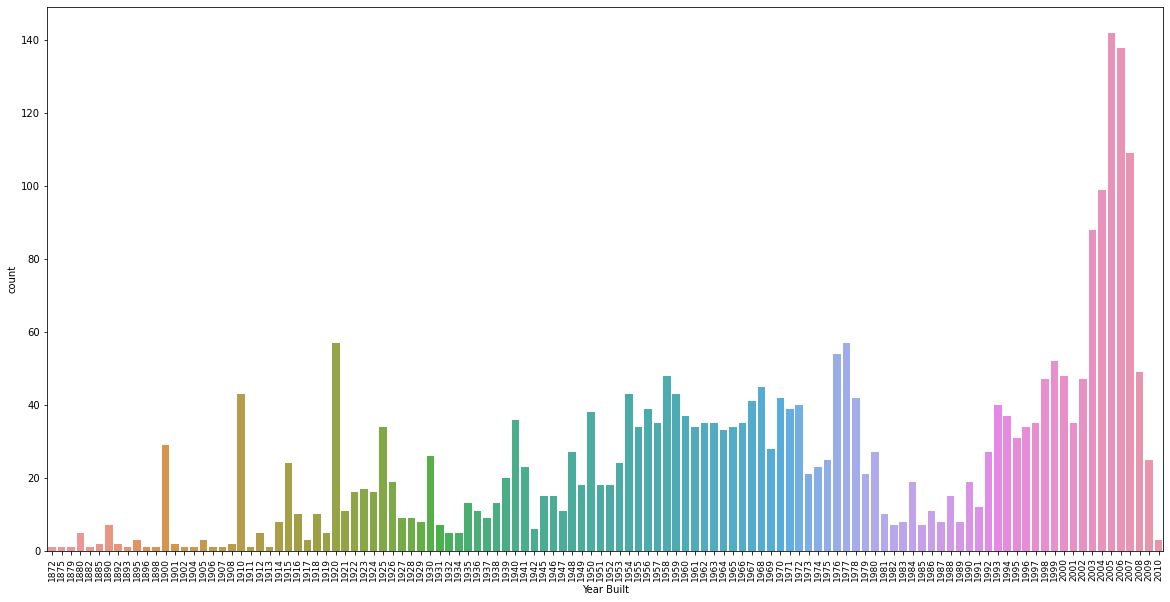

In [10]:
plt.figure(figsize=(20,10))
sns.countplot(x='Year Built',data=df)
plt.xticks(rotation=90,fontsize=9)
plt.show()

# most house in the data set is newer house

In [11]:
df.SalePrice.describe()

# maximum price value is RM 755000
# minimum sale price is RM 12789
# the average sale price is about RM 180000

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

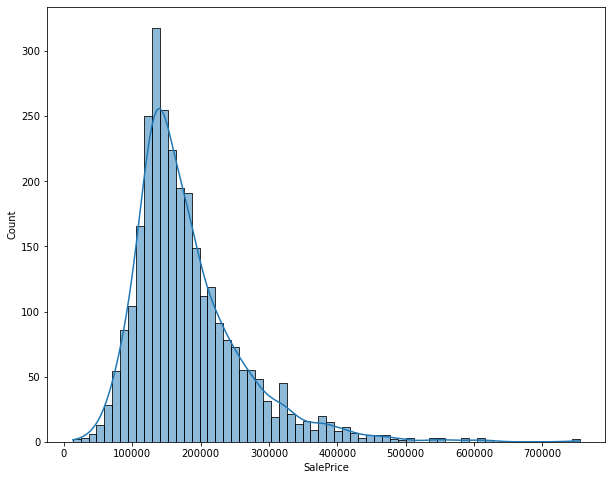

In [12]:
plt.figure(figsize=(10,8))
sns.histplot(x='SalePrice',data=df,kde=True);

# the sale price data is skewed left
# may need to remove the outliers above 500k

In [13]:
from scipy.stats import skew,norm

skewness: 1.743500


C:\Users\Mellon\anaconda3\envs\NSSDC\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


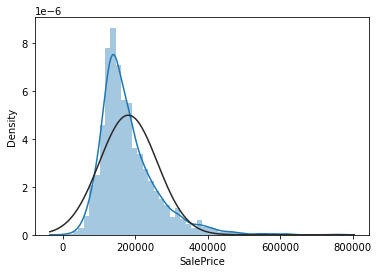

In [14]:
# Kernel Density Plot

sns.distplot(df.SalePrice,fit=norm);
plt.ylabel=('Frequency')
plt.title=('SalePrice distribution');

# Get the fitted parameters used by the function

(mu, sigma) = norm.fit(df['SalePrice']);

print("skewness: %f" % df['SalePrice'].skew());

our understanding so far :
    
most house in the data set is newer houses

however, the most price is below 200k with several outliers above the value

In [15]:
# Make column labels lowercase
df.columns = map(str.lower, df.columns)

# Replace spaces in columns with underscore
df.columns = df.columns.str.replace('\s+', '_')

In [16]:
print('Data: \n')
print("Number of columns: "+ str(df.shape[1]))
print("Number of rows: "+ str(df.shape[0]))

Data: 

Number of columns: 81
Number of rows: 2930


In [17]:
df.head()

,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,...,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_condition,saleprice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


# fixing outliers

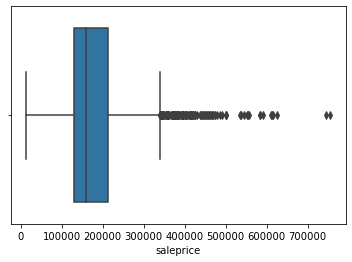

In [18]:
sns.boxplot(x='saleprice',data=df);

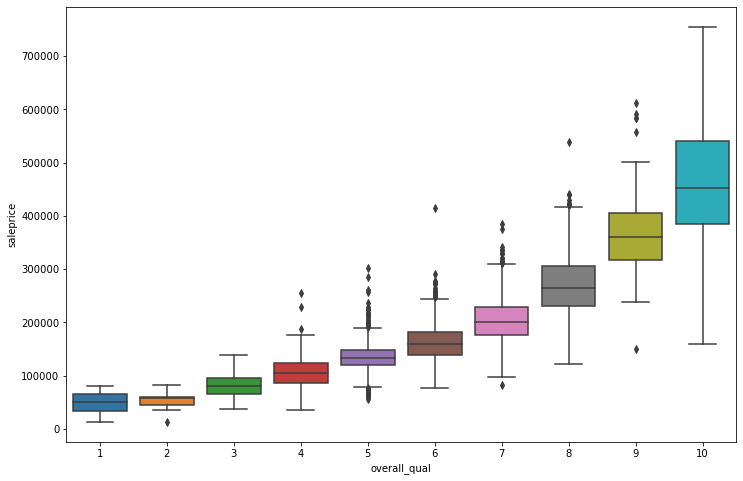

In [19]:
#overall_qual
#doesnt make sense to remove any of the data!!

#box plot overallqual/saleprice
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x='overall_qual',y='saleprice')
plt.show()


<AxesSubplot:xlabel='overall_qual', ylabel='saleprice'>

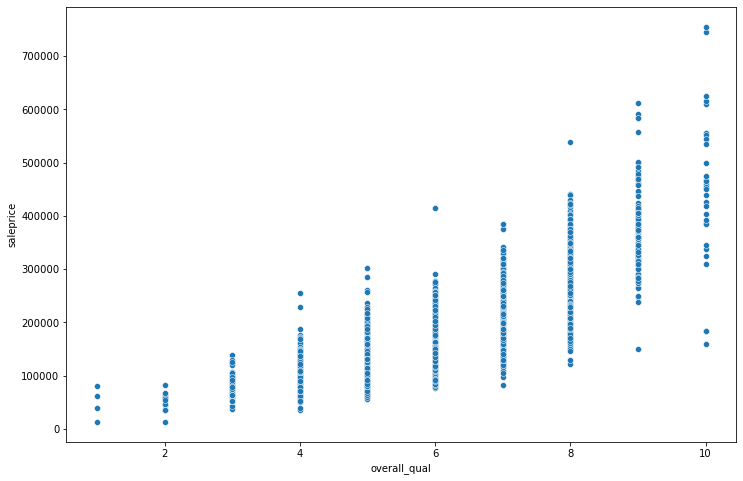

In [20]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='overall_qual',y='saleprice',data=df)

<Figure size 1800x900 with 0 Axes>

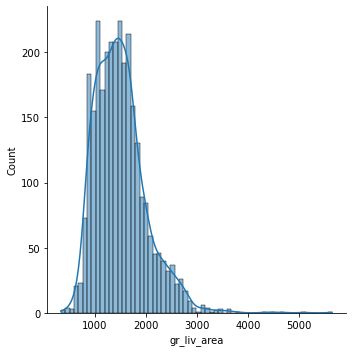

In [21]:
#gr_liv_area
plt.figure(figsize=(20,10),dpi=90)
sns.displot(df['gr_liv_area'],kde=True)
plt.show()

<AxesSubplot:xlabel='gr_liv_area', ylabel='saleprice'>

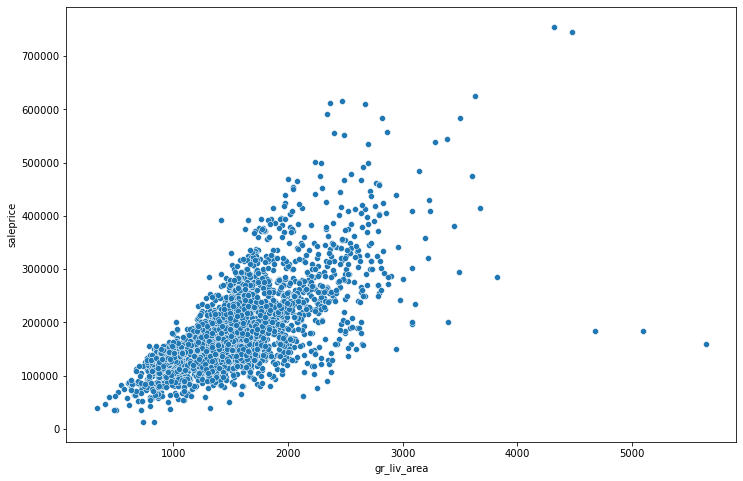

In [22]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='gr_liv_area',y='saleprice',data=df)

In [23]:
#remove using visual aid
df = df.drop(df[(df['gr_liv_area']>4000) & (df['gr_liv_area']<400000)].index)

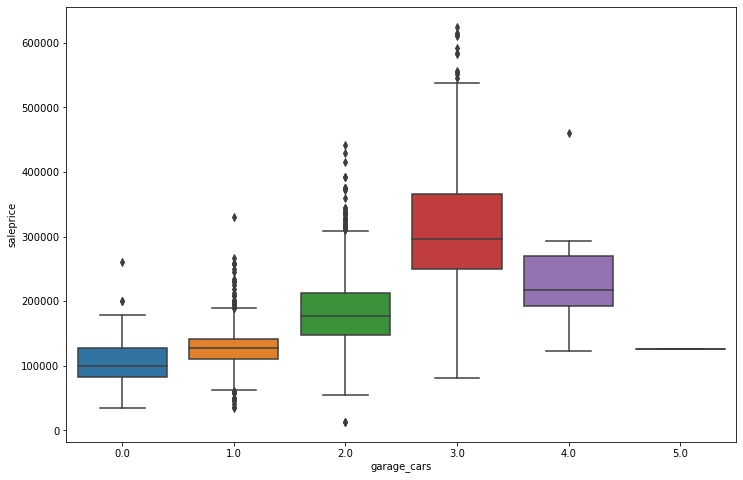

In [24]:
#garage_cars
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x='garage_cars',y='saleprice')
plt.show()



<AxesSubplot:xlabel='garage_cars', ylabel='saleprice'>

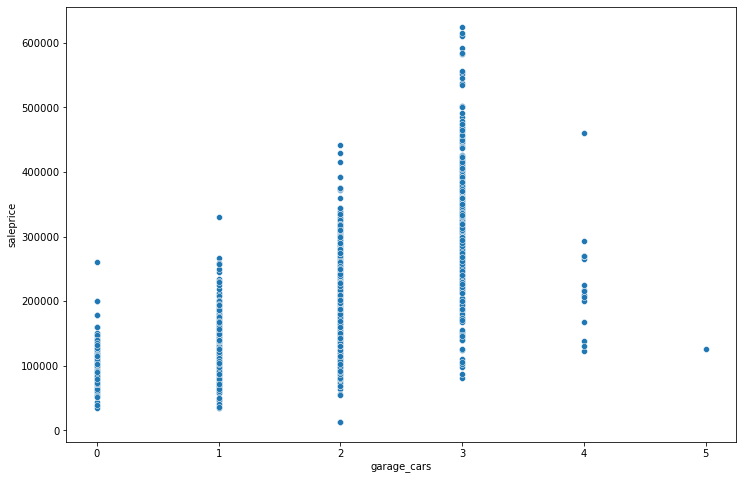

In [25]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='garage_cars',y='saleprice',data=df)

<Figure size 1800x900 with 0 Axes>

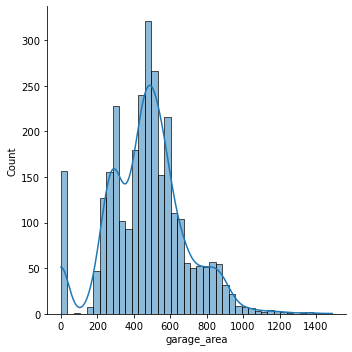

In [26]:
#garage_area
plt.figure(figsize=(20,10),dpi=90)
sns.displot(df['garage_area'],kde=True)
plt.show()

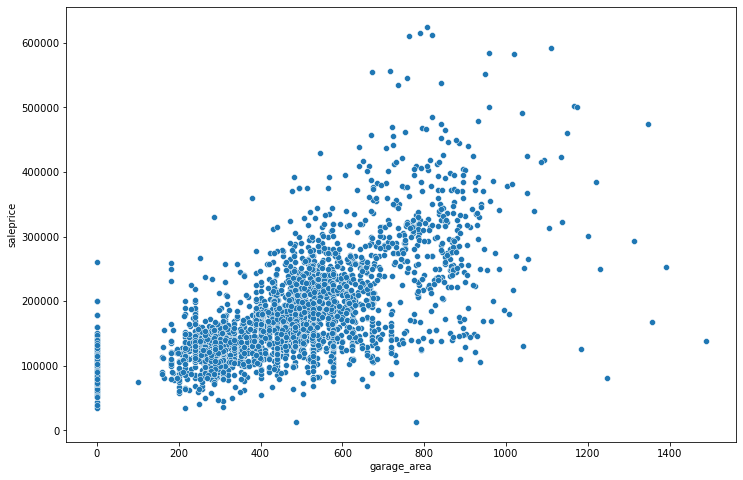

In [27]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='garage_area',y='saleprice',data=df)
plt.show()

In [28]:
#remove using visual aid
df = df.drop(df[(df['garage_area']>1200)].index)

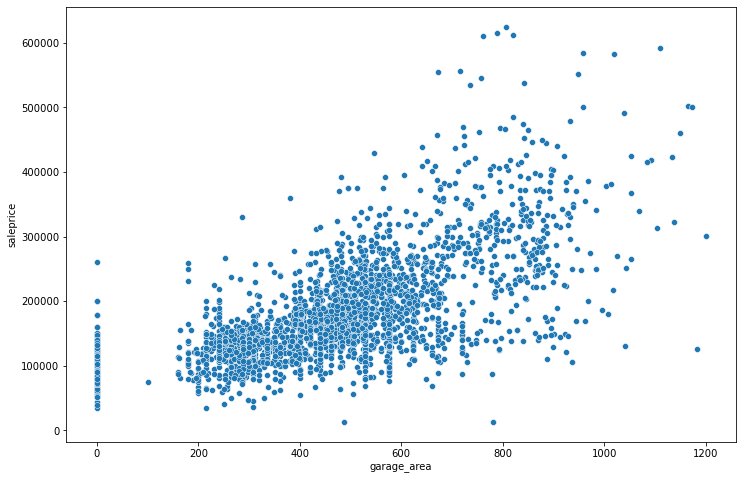

In [29]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='garage_area',y='saleprice',data=df)
plt.show()

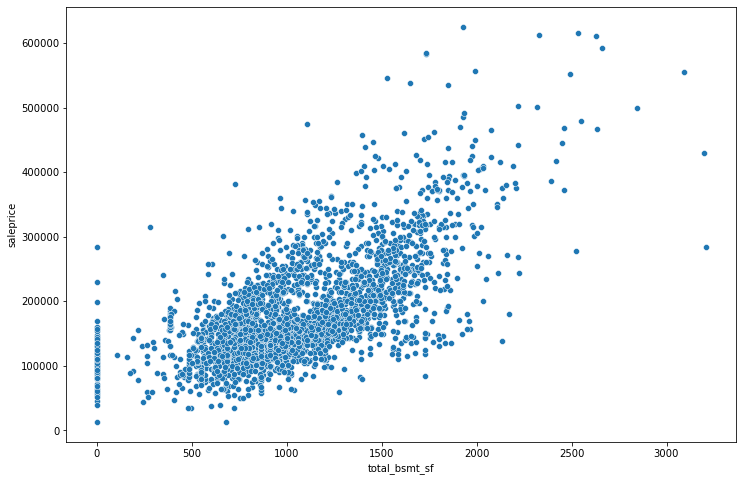

In [30]:
#total_bsmt_sf
plt.figure(figsize=(12,8))
sns.scatterplot(x='total_bsmt_sf',y='saleprice',data=df)
plt.show()

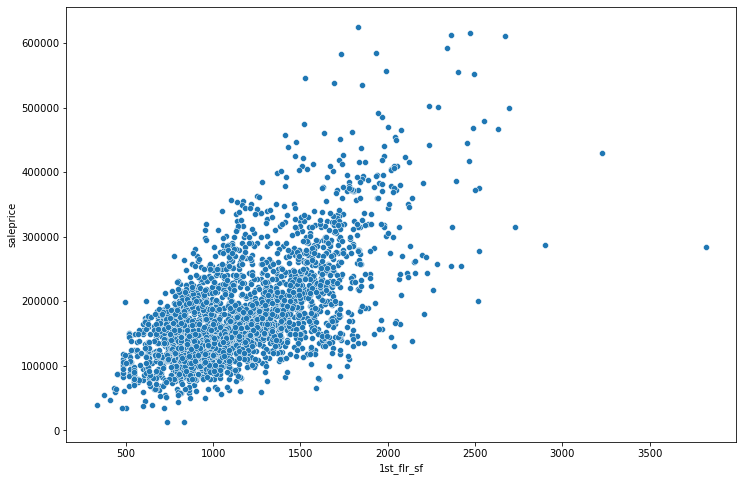

In [31]:
#1st_flr_sf 
plt.figure(figsize=(12,8))
sns.scatterplot(x='1st_flr_sf',y='saleprice',data=df)
plt.show()

In [32]:
#remove using visual aid
df = df.drop(df[(df['1st_flr_sf']>3500)].index)

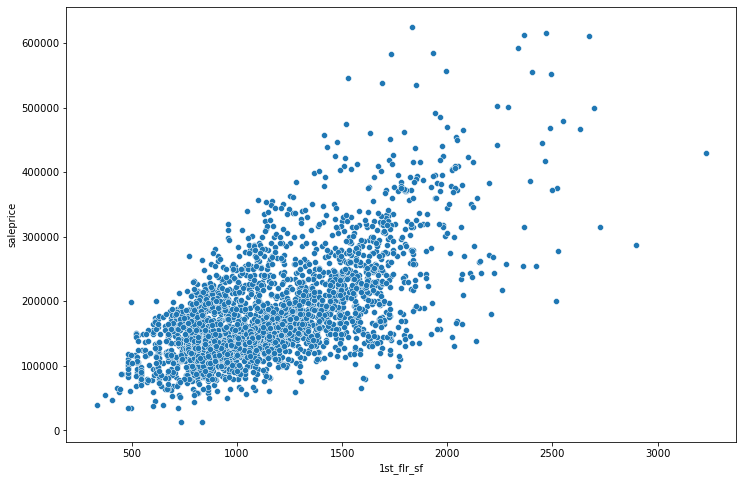

In [33]:
#after
plt.figure(figsize=(12,8))
sns.scatterplot(x='1st_flr_sf',y='saleprice',data=df)
plt.show()

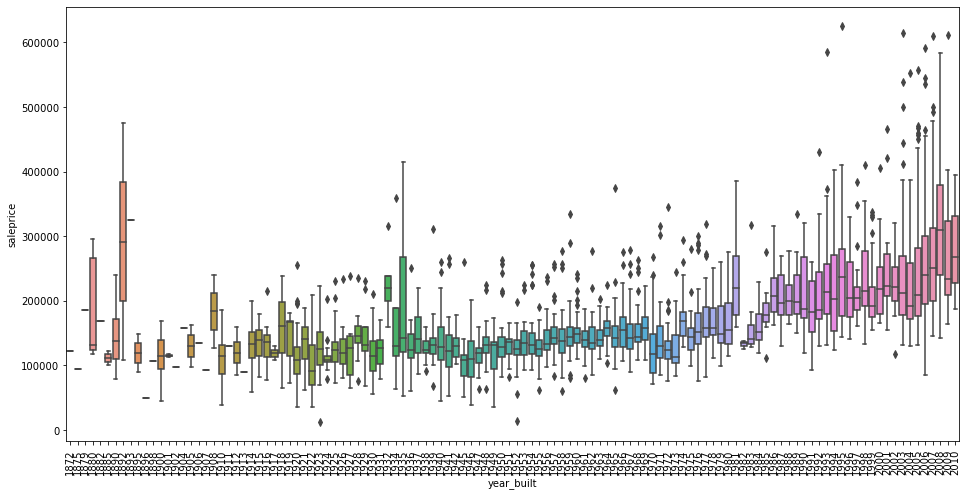

In [34]:
#year_built
plt.figure(figsize=(16,8))

sns.boxplot(data=df, x='year_built',y='saleprice')
plt.xticks(rotation=90)
plt.show()

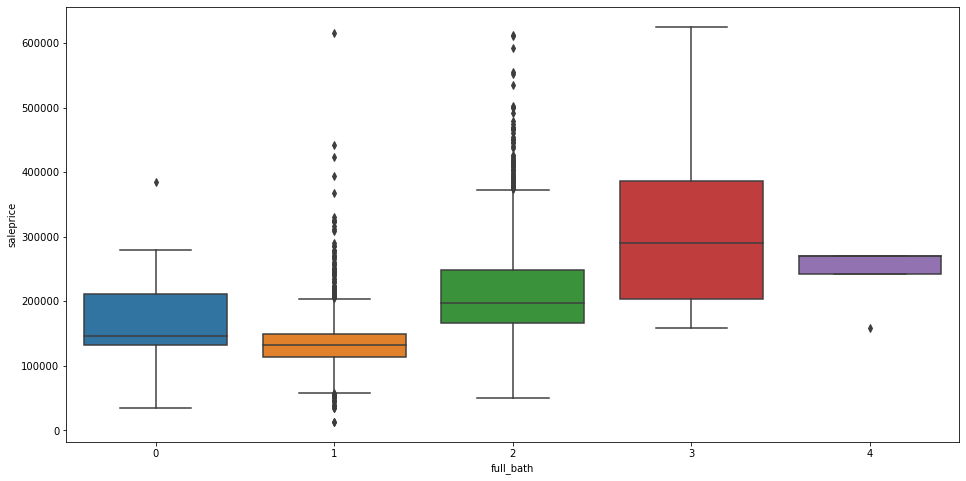

In [35]:
#full_bath
plt.figure(figsize=(16,8))

sns.boxplot(data=df, x='full_bath',y='saleprice')
plt.show()

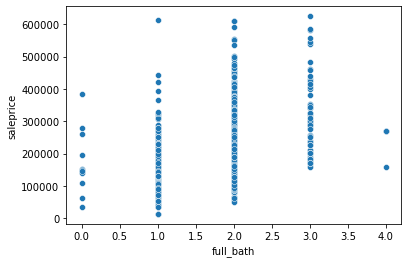

In [36]:
sns.scatterplot(x='full_bath',y='saleprice',data=df);

In [37]:
df.index[df['full_bath']==1.0] & df.index[df['saleprice']<10.0]

df.loc[[181,1553]]

df.drop([181,1553],axis=0,inplace=True)

In [38]:
df.index[df['full_bath']==0] & df.index[df['saleprice']>300000]

df.drop([2522],axis=0,inplace=True)

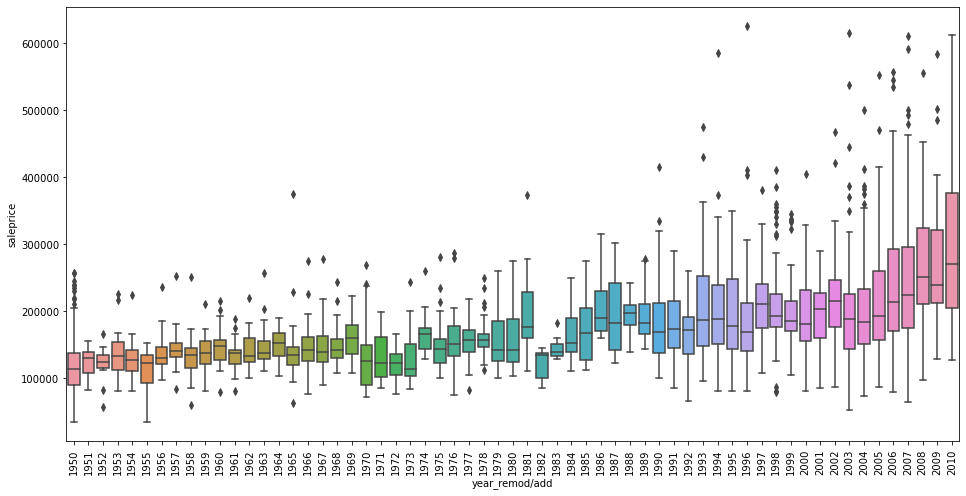

In [39]:
#year_remod/add
plt.figure(figsize=(16,8))

sns.boxplot(data=df, x='year_remod/add',y='saleprice')
plt.xticks(rotation=90)
plt.show()

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2913 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pid              2913 non-null   int64  
 1   ms_subclass      2913 non-null   int64  
 2   ms_zoning        2913 non-null   object 
 3   lot_frontage     2425 non-null   float64
 4   lot_area         2913 non-null   int64  
 5   street           2913 non-null   object 
 6   alley            197 non-null    object 
 7   lot_shape        2913 non-null   object 
 8   land_contour     2913 non-null   object 
 9   utilities        2913 non-null   object 
 10  lot_config       2913 non-null   object 
 11  land_slope       2913 non-null   object 
 12  neighborhood     2913 non-null   object 
 13  condition_1      2913 non-null   object 
 14  condition_2      2913 non-null   object 
 15  bldg_type        2913 non-null   object 
 16  house_style      2913 non-null   object 
 17  overall_qual  

# fixing skewness

In [41]:
#log transform the data saleprice
#df["saleprice"] = np.log1p(df["saleprice"])

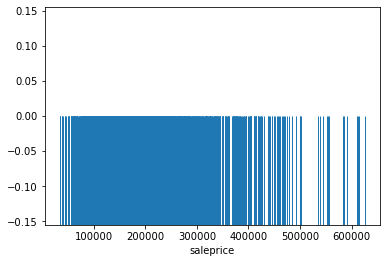

In [42]:
sns.rugplot(x='saleprice',data=df,height=0.5);

In [43]:
df['saleprice'].skew()

1.6063900672655889

In [44]:
df["saleprice"] = np.log1p(df["saleprice"])

In [45]:
df['saleprice'].skew()

0.11813076467413562

skewness: 0.118131


C:\Users\Mellon\anaconda3\envs\NSSDC\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


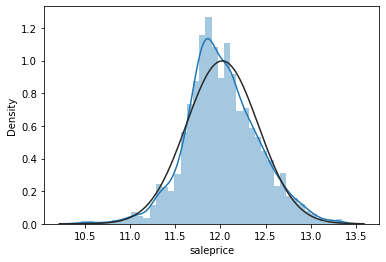

In [46]:
# Kernel Density Plot

sns.distplot(df.saleprice,fit=norm);
plt.ylabel=('Frequency')
plt.title=('SalePrice distribution');

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['saleprice']);

print("skewness: %f" % df['saleprice'].skew());




<AxesSubplot:>

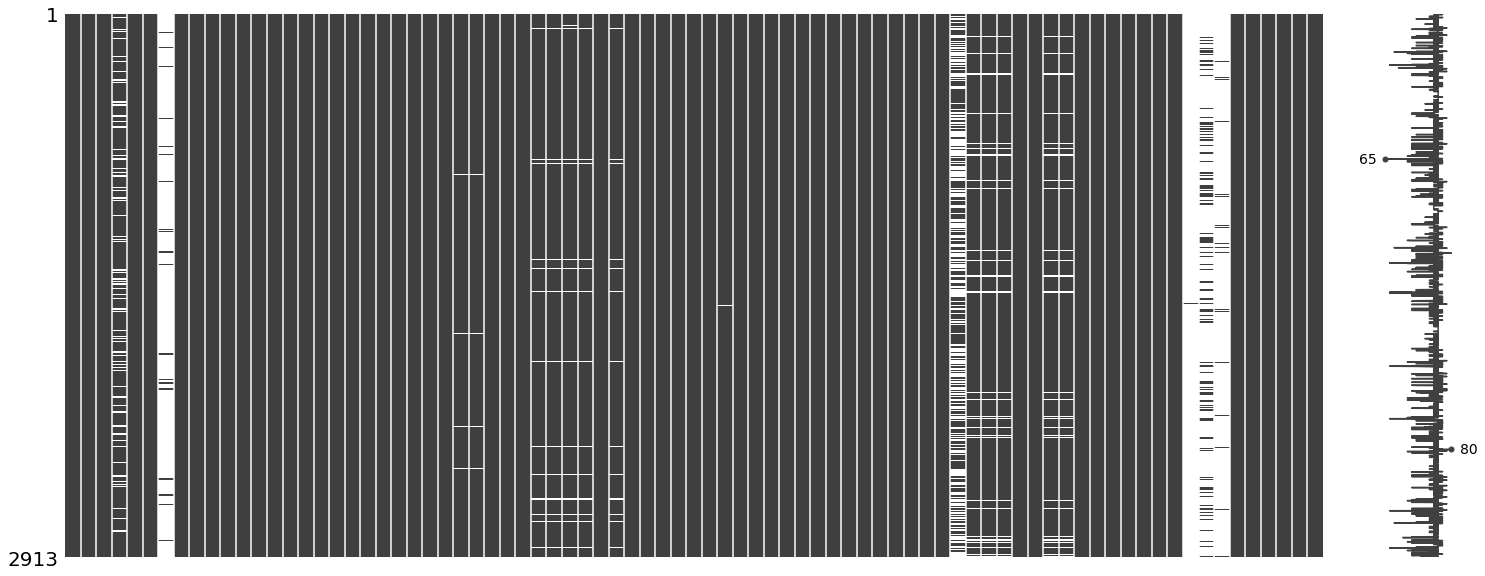

In [47]:
#visualize missing data
msno.matrix(df)

In [48]:
print("df size is : {}".format(df.shape))
missingdf = (df.isnull().sum() / len(df)) * 100
missingdf = missingdf.drop(missingdf[missingdf == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :missingdf})
missing_data.head(20)

df size is : (2913, 81)


,Missing Ratio
pool_qc,99.622382
misc_feature,96.429797
alley,93.237212
fence,80.466873
fireplace_qu,48.712667
lot_frontage,16.752489
garage_yr_blt,5.458290
garage_cond,5.458290
garage_qual,5.458290
garage_finish,5.458290


# remove unnecessary features

In [49]:
#remove the column PID, not usefull features
df = df.drop("pid",axis=1)

In [50]:
#remove utilities because the data mostly is the same only 3 entry is different
df = df.drop(['utilities'], axis=1)

# input missing values

is added based on the description notes

<AxesSubplot:>

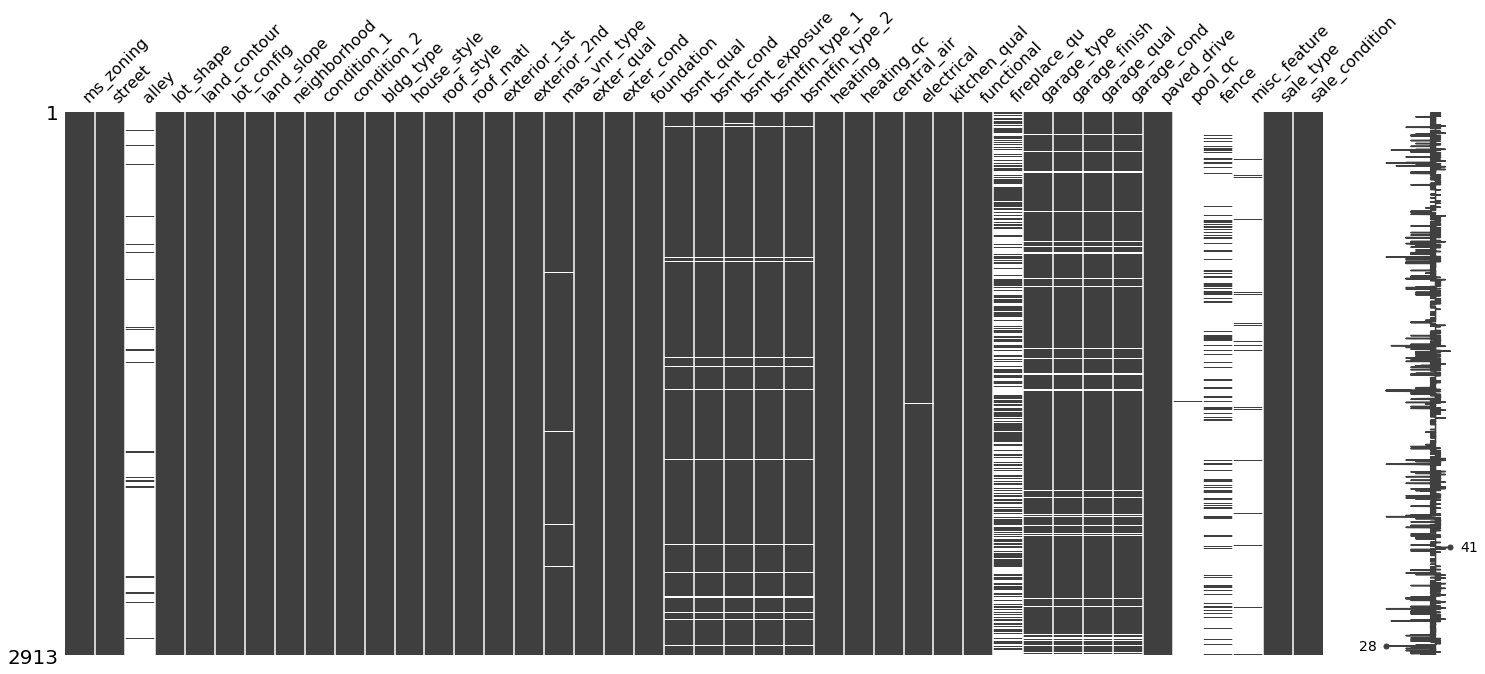

In [51]:
msno.matrix(df.select_dtypes(include='object'))

In [52]:
#object type
df_objs = df.select_dtypes(include='object')
df_objs

,ms_zoning,street,alley,lot_shape,land_contour,lot_config,land_slope,neighborhood,condition_1,condition_2,...,garage_type,garage_finish,garage_qual,garage_cond,paved_drive,pool_qc,fence,misc_feature,sale_type,sale_condition
0,RL,Pave,NaN,IR1,Lvl,Corner,Gtl,NAmes,Norm,Norm,...,Attchd,Fin,TA,TA,P,NaN,NaN,NaN,WD,Normal
1,RH,Pave,NaN,Reg,Lvl,Inside,Gtl,NAmes,Feedr,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,Corner,Gtl,NAmes,Norm,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
3,RL,Pave,NaN,Reg,Lvl,Corner,Gtl,NAmes,Norm,Norm,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,...,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,Pave,NaN,IR1,Lvl,CulDSac,Gtl,Mitchel,Norm,Norm,...,Detchd,Unf,TA,TA,Y,NaN,GdPrv,NaN,WD,Normal
2926,RL,Pave,NaN,IR1,Low,Inside,Mod,Mitchel,Norm,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
2927,RL,Pave,NaN,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,...,NaN,NaN,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal
2928,RL,Pave,NaN,Reg,Lvl,Inside,Mod,Mitchel,Norm,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [53]:
#i try to group them up into clusters with same values

#values "none"
for col in ('pool_qc','misc_feature','garage_type','alley','fence','fireplace_qu','garage_finish', 'garage_qual', 'garage_cond','mas_vnr_type','ms_subclass'):
    df[col] = df[col].fillna('None')

In [54]:
# For below categorical basement-related features, NaN means that there is no basement.
for col in ('bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2'):
    df[col] = df[col].fillna('None')

In [55]:
#MSZoning classification : 'RL' is common
df['ms_zoning'] = df['ms_zoning'].fillna(df['ms_zoning'].fillna("RL"))

In [56]:
df["functional"] = df["functional"].fillna("Typ")

In [57]:
# Electrical standard  = SBrkr
df['electrical'] = df['electrical'].fillna(df['electrical'].fillna("SBrkr"))

In [58]:
# KitchenQual
df['kitchen_qual'] = df['kitchen_qual'].fillna(df['kitchen_qual'].fillna("TA"))

In [59]:
# Exterior1st and Exterior2nd
df['exterior_1st'] = df['exterior_1st'].fillna(df['exterior_1st'].fillna('Other'))
df['exterior_2nd'] = df['exterior_2nd'].fillna(df['exterior_2nd'].fillna('Other'))

In [60]:
#SaleType
df['sale_type'] = df['sale_type'].fillna(df['sale_type'].fillna('Oth'))

<AxesSubplot:>

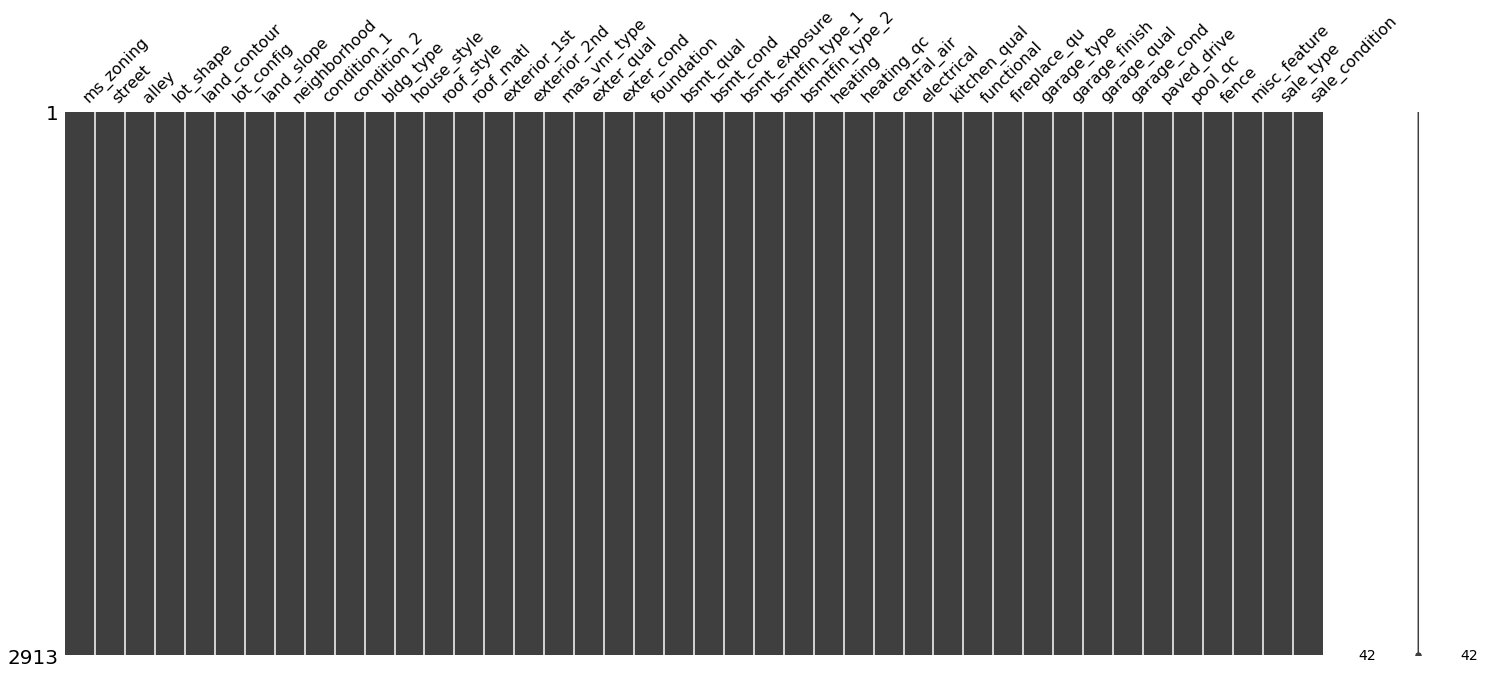

In [61]:
msno.matrix(df.select_dtypes(include='object'))

In [62]:
#integer type
df_objs = df.select_dtypes(exclude='object')
df_objs

,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,...,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
0,20,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,...,210,62,0,0,0,0,0,5,2010,12.278398
1,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,140,0,0,0,120,0,0,6,2010,11.561725
2,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,393,36,0,0,0,0,12500,6,2010,12.055256
3,20,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,...,0,0,0,0,0,0,0,4,2010,12.404928
4,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,212,34,0,0,0,0,0,3,2010,12.154258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,37.0,7937,6,6,1984,1984,0.0,819.0,0.0,...,120,0,0,0,0,0,0,3,2006,11.867104
2926,20,NaN,8885,5,5,1983,1983,0.0,301.0,324.0,...,164,0,0,0,0,0,0,6,2006,11.782960
2927,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,80,32,0,0,0,0,700,7,2006,11.790565
2928,20,77.0,10010,5,5,1974,1975,0.0,1071.0,123.0,...,240,38,0,0,0,0,0,4,2006,12.043560


<AxesSubplot:>

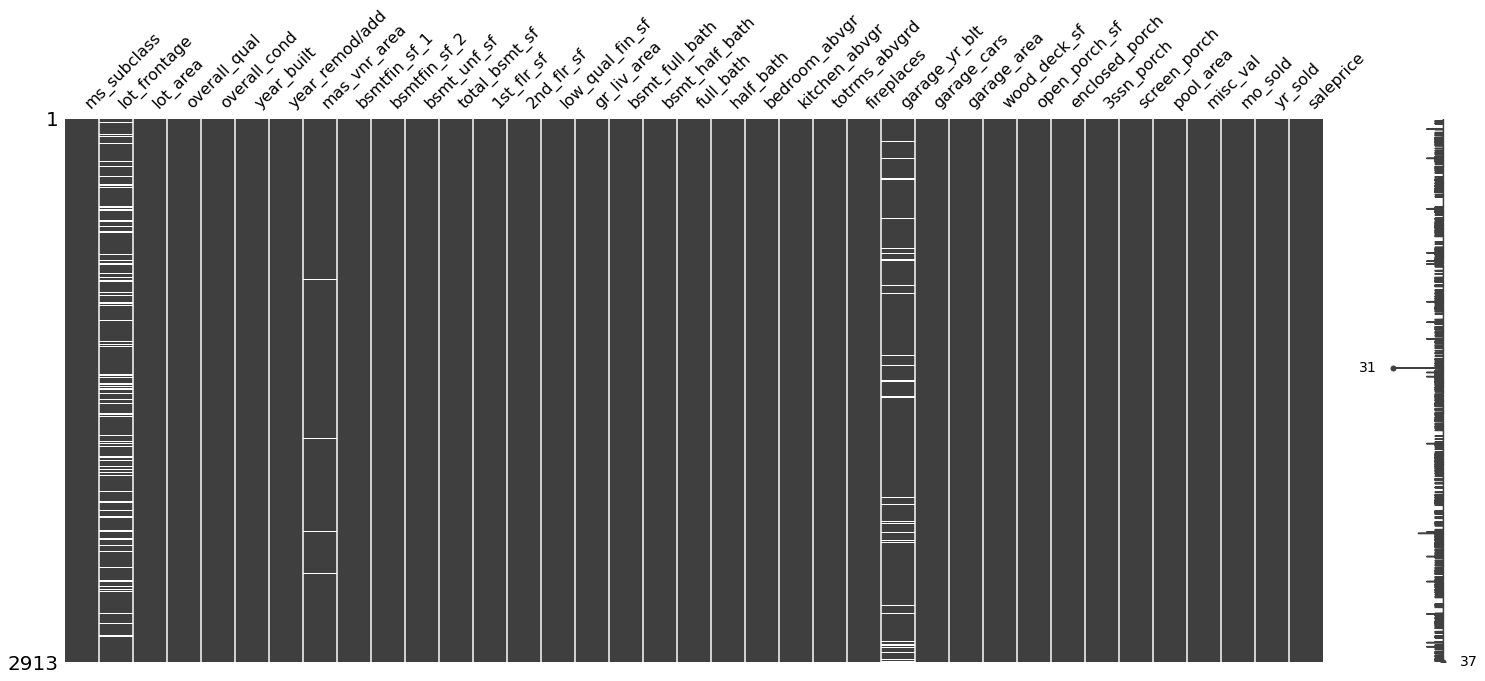

In [63]:
msno.matrix(df.select_dtypes(exclude='object'))

In [64]:
# Replacing missing data with 0 (Since No garage = no cars in such garage).
for col in ('garage_yr_blt', 'garage_area', 'garage_cars'):
    df[col] = df[col].fillna(0)

In [65]:
# missing values are likely zero for having no basement 
for col in ('bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf','total_bsmt_sf', 'bsmt_full_bath', 'bsmt_half_bath'):
    df[col] = df[col].fillna(0)

In [66]:
df["mas_vnr_area"] = df["mas_vnr_area"].fillna(0)

In [67]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
df["lot_frontage"] = df.groupby("neighborhood")["lot_frontage"].transform(lambda x: x.fillna(x.median()))

C:\Users\Mellon\anaconda3\envs\NSSDC\lib\site-packages\numpy\lib\nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [68]:
#there are still missing values for lot_frontage
#fill it with median
df["lot_frontage"] = df["lot_frontage"].fillna(df['lot_frontage'].median())

# some numeric are actually categorical

In [69]:
#dang need run this everytime i imported from csv...cos evertime imported in the astype changed back
# Transforming required numerical features to categorical

df['ms_subclass'] = df['ms_subclass'].astype(str)
df['overall_cond'] = df['overall_cond'].astype(str)
df['yr_sold'] = df['yr_sold'].astype(str)
df['mo_sold'] = df['mo_sold'].astype(str)

In [70]:
df['lot_frontage'].isnull().values.any()

False

<AxesSubplot:>

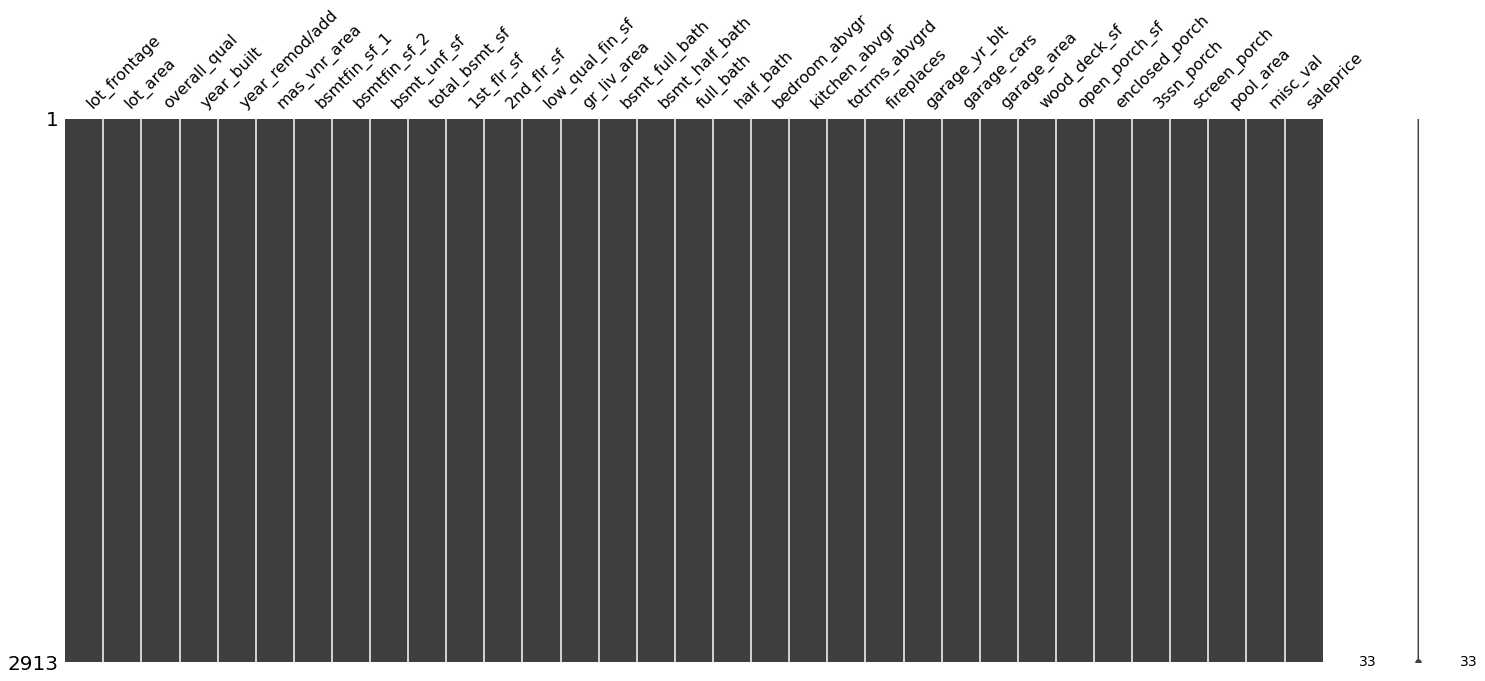

In [71]:
msno.matrix(df.select_dtypes(exclude='object'))

In [72]:
#list of features with missng values
listmiss = df.columns[df.isnull().any()].tolist()
listmiss
#df.columns[df.isnull().any()] #does the same 
#if empty..means no more 

[]

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2913 entries, 0 to 2929
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ms_subclass      2913 non-null   object 
 1   ms_zoning        2913 non-null   object 
 2   lot_frontage     2913 non-null   float64
 3   lot_area         2913 non-null   int64  
 4   street           2913 non-null   object 
 5   alley            2913 non-null   object 
 6   lot_shape        2913 non-null   object 
 7   land_contour     2913 non-null   object 
 8   lot_config       2913 non-null   object 
 9   land_slope       2913 non-null   object 
 10  neighborhood     2913 non-null   object 
 11  condition_1      2913 non-null   object 
 12  condition_2      2913 non-null   object 
 13  bldg_type        2913 non-null   object 
 14  house_style      2913 non-null   object 
 15  overall_qual     2913 non-null   int64  
 16  overall_cond     2913 non-null   object 
 17  year_built    

In [74]:
#dang need run this everytime i imported from csv...cos evertime imported in the astype changed back
# Transforming required numerical features to categorical

df['ms_subclass'] = df['ms_subclass'].astype(str)
df['overall_cond'] = df['overall_cond'].astype(str)
df['yr_sold'] = df['yr_sold'].astype(str)
df['mo_sold'] = df['mo_sold'].astype(str)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2913 entries, 0 to 2929
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ms_subclass      2913 non-null   object 
 1   ms_zoning        2913 non-null   object 
 2   lot_frontage     2913 non-null   float64
 3   lot_area         2913 non-null   int64  
 4   street           2913 non-null   object 
 5   alley            2913 non-null   object 
 6   lot_shape        2913 non-null   object 
 7   land_contour     2913 non-null   object 
 8   lot_config       2913 non-null   object 
 9   land_slope       2913 non-null   object 
 10  neighborhood     2913 non-null   object 
 11  condition_1      2913 non-null   object 
 12  condition_2      2913 non-null   object 
 13  bldg_type        2913 non-null   object 
 14  house_style      2913 non-null   object 
 15  overall_qual     2913 non-null   int64  
 16  overall_cond     2913 non-null   object 
 17  year_built    

In [76]:
df_objs = df.select_dtypes(include='object')
df_objs

,ms_subclass,ms_zoning,street,alley,lot_shape,land_contour,lot_config,land_slope,neighborhood,condition_1,...,garage_qual,garage_cond,paved_drive,pool_qc,fence,misc_feature,mo_sold,yr_sold,sale_type,sale_condition
0,20,RL,Pave,None,IR1,Lvl,Corner,Gtl,NAmes,Norm,...,TA,TA,P,None,None,None,5,2010,WD,Normal
1,20,RH,Pave,None,Reg,Lvl,Inside,Gtl,NAmes,Feedr,...,TA,TA,Y,None,MnPrv,None,6,2010,WD,Normal
2,20,RL,Pave,None,IR1,Lvl,Corner,Gtl,NAmes,Norm,...,TA,TA,Y,None,None,Gar2,6,2010,WD,Normal
3,20,RL,Pave,None,Reg,Lvl,Corner,Gtl,NAmes,Norm,...,TA,TA,Y,None,None,None,4,2010,WD,Normal
4,60,RL,Pave,None,IR1,Lvl,Inside,Gtl,Gilbert,Norm,...,TA,TA,Y,None,MnPrv,None,3,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,RL,Pave,None,IR1,Lvl,CulDSac,Gtl,Mitchel,Norm,...,TA,TA,Y,None,GdPrv,None,3,2006,WD,Normal
2926,20,RL,Pave,None,IR1,Low,Inside,Mod,Mitchel,Norm,...,TA,TA,Y,None,MnPrv,None,6,2006,WD,Normal
2927,85,RL,Pave,None,Reg,Lvl,Inside,Gtl,Mitchel,Norm,...,None,None,Y,None,MnPrv,Shed,7,2006,WD,Normal
2928,20,RL,Pave,None,Reg,Lvl,Inside,Mod,Mitchel,Norm,...,TA,TA,Y,None,None,None,4,2006,WD,Normal


In [77]:
df_num = df.select_dtypes(exclude='object')
df_num

,lot_frontage,lot_area,overall_qual,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,...,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,saleprice
0,141.0,31770,6,1960,1960,112.0,639.0,0.0,441.0,1080.0,...,2.0,528.0,210,62,0,0,0,0,0,12.278398
1,80.0,11622,5,1961,1961,0.0,468.0,144.0,270.0,882.0,...,1.0,730.0,140,0,0,0,120,0,0,11.561725
2,81.0,14267,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,...,1.0,312.0,393,36,0,0,0,0,12500,12.055256
3,93.0,11160,7,1968,1968,0.0,1065.0,0.0,1045.0,2110.0,...,2.0,522.0,0,0,0,0,0,0,0,12.404928
4,74.0,13830,5,1997,1998,0.0,791.0,0.0,137.0,928.0,...,2.0,482.0,212,34,0,0,0,0,0,12.154258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,37.0,7937,6,1984,1984,0.0,819.0,0.0,184.0,1003.0,...,2.0,588.0,120,0,0,0,0,0,0,11.867104
2926,74.0,8885,5,1983,1983,0.0,301.0,324.0,239.0,864.0,...,2.0,484.0,164,0,0,0,0,0,0,11.782960
2927,62.0,10441,5,1992,1992,0.0,337.0,0.0,575.0,912.0,...,0.0,0.0,80,32,0,0,0,0,700,11.790565
2928,77.0,10010,5,1974,1975,0.0,1071.0,123.0,195.0,1389.0,...,2.0,418.0,240,38,0,0,0,0,0,12.043560


# Ordinal encoding

In [78]:
encoder = OrdinalEncoder()

In [79]:
df['fireplace_qu'] = encoder.fit_transform(df[['fireplace_qu']])
df['bsmt_qual'] = encoder.fit_transform(df[['bsmt_qual']])
df['bsmt_cond'] = encoder.fit_transform(df[['bsmt_cond']])
df['garage_qual'] = encoder.fit_transform(df[['garage_qual']])
df['garage_cond'] = encoder.fit_transform(df[['garage_cond']])
df['exter_qual'] = encoder.fit_transform(df[['exter_qual']])
df['exter_cond'] = encoder.fit_transform(df[['exter_cond']])
df['heating_qc'] = encoder.fit_transform(df[['heating_qc']])
df['pool_qc'] = encoder.fit_transform(df[['pool_qc']])
df['kitchen_qual'] = encoder.fit_transform(df[['kitchen_qual']])
df['bsmtfin_type_1'] = encoder.fit_transform(df[['bsmtfin_type_1']])
df['bsmtfin_type_2'] = encoder.fit_transform(df[['bsmtfin_type_2']])
df['functional'] = encoder.fit_transform(df[['functional']])
df['fence'] = encoder.fit_transform(df[['fence']])
df['bsmt_exposure'] = encoder.fit_transform(df[['bsmt_exposure']])
df['garage_finish'] = encoder.fit_transform(df[['garage_finish']])
df['land_slope'] = encoder.fit_transform(df[['land_slope']])
df['lot_shape'] = encoder.fit_transform(df[['lot_shape']])
df['paved_drive'] = encoder.fit_transform(df[['paved_drive']])
df['street'] = encoder.fit_transform(df[['street']])
df['alley'] = encoder.fit_transform(df[['alley']])

#numeric but categorical
df['central_air'] = encoder.fit_transform(df[['central_air']])
df['ms_subclass'] = encoder.fit_transform(df[['ms_subclass']])
df['overall_cond'] = encoder.fit_transform(df[['overall_cond']])
df['mo_sold'] = encoder.fit_transform(df[['mo_sold']])
df['yr_sold'] = encoder.fit_transform(df[['yr_sold']])

In [80]:
df['central_air'].head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: central_air, dtype: float64

In [81]:
df_objs = df.select_dtypes(include='object')
df_objs

,ms_zoning,land_contour,lot_config,neighborhood,condition_1,condition_2,bldg_type,house_style,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,foundation,heating,electrical,garage_type,misc_feature,sale_type,sale_condition
0,RL,Lvl,Corner,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,Plywood,Stone,CBlock,GasA,SBrkr,Attchd,None,WD,Normal
1,RH,Lvl,Inside,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,CBlock,GasA,SBrkr,Attchd,None,WD,Normal
2,RL,Lvl,Corner,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,CBlock,GasA,SBrkr,Attchd,Gar2,WD,Normal
3,RL,Lvl,Corner,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,BrkFace,None,CBlock,GasA,SBrkr,Attchd,None,WD,Normal
4,RL,Lvl,Inside,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,PConc,GasA,SBrkr,Attchd,None,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,Lvl,CulDSac,Mitchel,Norm,Norm,1Fam,SLvl,Gable,CompShg,HdBoard,HdBoard,None,CBlock,GasA,SBrkr,Detchd,None,WD,Normal
2926,RL,Low,Inside,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,None,CBlock,GasA,SBrkr,Attchd,None,WD,Normal
2927,RL,Lvl,Inside,Mitchel,Norm,Norm,1Fam,SFoyer,Gable,CompShg,HdBoard,Wd Shng,None,PConc,GasA,SBrkr,None,Shed,WD,Normal
2928,RL,Lvl,Inside,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,None,CBlock,GasA,SBrkr,Attchd,None,WD,Normal


# fixing skewness of categorical data

In [82]:
#fix skweness of features of datatype object
#dont do it after oHE cos the data in OHE is already modified and not suitable

#find the features in df_num with most skewness
df_num.skew().sort_values(ascending=False)

misc_val           22.193708
pool_area          18.704990
lot_area           13.507324
low_qual_fin_sf    12.082312
3ssn_porch         11.369962
kitchen_abvgr       4.299354
bsmtfin_sf_2        4.126913
enclosed_porch      4.006794
bsmt_half_bath      3.987573
screen_porch        3.972645
mas_vnr_area        2.583810
open_porch_sf       2.488304
wood_deck_sf        1.813890
lot_frontage        1.095284
bsmt_unf_sf         0.919991
gr_liv_area         0.859788
1st_flr_sf          0.850611
2nd_flr_sf          0.841507
bsmtfin_sf_1        0.809955
fireplaces          0.735446
totrms_abvgrd       0.704095
half_bath           0.702842
bsmt_full_bath      0.613183
total_bsmt_sf       0.397746
bedroom_abvgr       0.316177
overall_qual        0.189103
full_bath           0.167950
saleprice           0.118131
garage_area         0.069538
garage_cars        -0.240896
year_remod/add     -0.450477
year_built         -0.604454
garage_yr_blt      -3.903546
dtype: float64

In [83]:
#since its positive skew..try using log transform
df_num["misc_val"] = np.log1p(df["misc_val"])
df_num["pool_area"] = np.log1p(df["pool_area"])
df_num["lot_area"] = np.log1p(df["lot_area"])
df_num["low_qual_fin_sf"] = np.log1p(df["low_qual_fin_sf"])
df_num["3ssn_porch"] = np.log1p(df["3ssn_porch"])

C:\Users\Mellon\anaconda3\envs\NSSDC\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Mellon\anaconda3\envs\NSSDC\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Mellon\anaconda3\envs\NSSDC\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [84]:

'''
#OHE the rest
df = pd.get_dummies(df)
print(df.shape)
'''

'\n#OHE the rest\ndf = pd.get_dummies(df)\nprint(df.shape)\n'

In [85]:
df_objs = df.select_dtypes(include='object')
df_objs

,ms_zoning,land_contour,lot_config,neighborhood,condition_1,condition_2,bldg_type,house_style,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,foundation,heating,electrical,garage_type,misc_feature,sale_type,sale_condition
0,RL,Lvl,Corner,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,Plywood,Stone,CBlock,GasA,SBrkr,Attchd,None,WD,Normal
1,RH,Lvl,Inside,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,CBlock,GasA,SBrkr,Attchd,None,WD,Normal
2,RL,Lvl,Corner,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,CBlock,GasA,SBrkr,Attchd,Gar2,WD,Normal
3,RL,Lvl,Corner,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,BrkFace,None,CBlock,GasA,SBrkr,Attchd,None,WD,Normal
4,RL,Lvl,Inside,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,PConc,GasA,SBrkr,Attchd,None,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,Lvl,CulDSac,Mitchel,Norm,Norm,1Fam,SLvl,Gable,CompShg,HdBoard,HdBoard,None,CBlock,GasA,SBrkr,Detchd,None,WD,Normal
2926,RL,Low,Inside,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,None,CBlock,GasA,SBrkr,Attchd,None,WD,Normal
2927,RL,Lvl,Inside,Mitchel,Norm,Norm,1Fam,SFoyer,Gable,CompShg,HdBoard,Wd Shng,None,PConc,GasA,SBrkr,None,Shed,WD,Normal
2928,RL,Lvl,Inside,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,None,CBlock,GasA,SBrkr,Attchd,None,WD,Normal


In [86]:
df_num = df.select_dtypes(exclude='object')
df_num

,ms_subclass,lot_frontage,lot_area,street,alley,lot_shape,land_slope,overall_qual,overall_cond,year_built,...,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_val,mo_sold,yr_sold,saleprice
0,5.0,141.0,31770,1.0,1.0,0.0,0.0,6,4.0,1960,...,0,0,0,0,3.0,4.0,0,7.0,4.0,12.278398
1,5.0,80.0,11622,1.0,1.0,3.0,0.0,5,5.0,1961,...,0,0,120,0,3.0,2.0,0,8.0,4.0,11.561725
2,5.0,81.0,14267,1.0,1.0,0.0,0.0,6,5.0,1958,...,0,0,0,0,3.0,4.0,12500,8.0,4.0,12.055256
3,5.0,93.0,11160,1.0,1.0,3.0,0.0,7,4.0,1968,...,0,0,0,0,3.0,4.0,0,6.0,4.0,12.404928
4,10.0,74.0,13830,1.0,1.0,0.0,0.0,5,4.0,1997,...,0,0,0,0,3.0,2.0,0,5.0,4.0,12.154258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,13.0,37.0,7937,1.0,1.0,0.0,0.0,6,5.0,1984,...,0,0,0,0,3.0,0.0,0,5.0,0.0,11.867104
2926,5.0,74.0,8885,1.0,1.0,0.0,1.0,5,4.0,1983,...,0,0,0,0,3.0,2.0,0,8.0,0.0,11.782960
2927,14.0,62.0,10441,1.0,1.0,3.0,0.0,5,4.0,1992,...,0,0,0,0,3.0,2.0,700,9.0,0.0,11.790565
2928,5.0,77.0,10010,1.0,1.0,3.0,1.0,5,4.0,1974,...,0,0,0,0,3.0,4.0,0,6.0,0.0,12.043560


In [87]:
#perform OHE on the rest of the data
df_objs = pd.get_dummies(df_objs)
df_objs

,ms_zoning_A (agr),ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,land_contour_Bnk,land_contour_HLS,land_contour_Low,...,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD,sale_condition_Abnorml,sale_condition_AdjLand,sale_condition_Alloca,sale_condition_Family,sale_condition_Normal,sale_condition_Partial
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2926,0,0,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2927,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2928,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [88]:
df = pd.concat([df_num,df_objs],axis=1)

In [89]:
df.head()

,ms_subclass,lot_frontage,lot_area,street,alley,lot_shape,land_slope,overall_qual,overall_cond,year_built,...,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD,sale_condition_Abnorml,sale_condition_AdjLand,sale_condition_Alloca,sale_condition_Family,sale_condition_Normal,sale_condition_Partial
0,5.0,141.0,31770,1.0,1.0,0.0,0.0,6,4.0,1960,...,0,0,0,1,0,0,0,0,1,0
1,5.0,80.0,11622,1.0,1.0,3.0,0.0,5,5.0,1961,...,0,0,0,1,0,0,0,0,1,0
2,5.0,81.0,14267,1.0,1.0,0.0,0.0,6,5.0,1958,...,0,0,0,1,0,0,0,0,1,0
3,5.0,93.0,11160,1.0,1.0,3.0,0.0,7,4.0,1968,...,0,0,0,1,0,0,0,0,1,0
4,10.0,74.0,13830,1.0,1.0,0.0,0.0,5,4.0,1997,...,0,0,0,1,0,0,0,0,1,0


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2913 entries, 0 to 2929
Columns: 229 entries, ms_subclass to sale_condition_Partial
dtypes: float64(38), int64(21), uint8(170)
memory usage: 1.9 MB


In [91]:
df.shape

(2913, 229)

# lasso has lowest error

In [92]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
import scipy as sp
from joblib import dump
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [93]:
df = pd.read_csv("cs1_part3_res.csv")

In [94]:
#Create  and y 
X = df.drop('saleprice',axis=1)
y = df['saleprice']

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [95]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [96]:
lasso_model = LassoCV(eps=0.1,n_alphas=100,cv=5)

In [97]:
lasso_model.fit(X_train,y_train)

LassoCV(cv=5, eps=0.1)

In [98]:
pred_test_lasso = lasso_model.predict(X_test)

In [99]:
pred_test_lasso

array([11.63617098, 12.39213744, 12.21488372, 12.67853172, 11.9213498 ,
       12.08732794, 12.3849744 , 12.13770562, 11.76977757, 12.17956592,
       12.04428419, 11.80174031, 12.03855752, 11.66626526, 11.78164518,
       11.50423766, 11.8584277 , 12.04917226, 12.0159083 , 11.78608874,
       11.78245679, 11.91291089, 12.43378017, 11.79649357, 12.57494488,
       11.88135444, 11.93506914, 11.4256482 , 12.40540527, 12.27790558,
       12.18541779, 11.80872499, 11.518407  , 12.04046023, 11.74654895,
       11.71778591, 11.80674808, 11.80619163, 12.10239748, 12.0181341 ,
       12.43633568, 11.79744105, 11.86659017, 12.04354918, 11.74954041,
       12.29650714, 11.94030557, 11.66963039, 11.58300743, 12.20482521,
       12.10369351, 12.53932471, 11.96937835, 11.64153515, 12.10958955,
       12.26507226, 12.05826323, 11.76618032, 11.78868314, 12.03805808,
       12.28460272, 12.67278084, 11.93477252, 11.710606  , 11.71383589,
       11.75747032, 12.02977928, 12.27735442, 12.1232964 , 11.80

In [100]:
MAE_Lasso = mean_absolute_error(y_test,pred_test_lasso)
MSE_Lasso = mean_squared_error(y_test,pred_test_lasso)
RMSE_Lasso = np.sqrt(MSE_Lasso)

In [101]:
MAE_Lasso

0.10439921456431396

In [102]:
MSE_Lasso

0.022477278055034355

In [103]:
RMSE_Lasso

0.14992424105205387

In [104]:
def MAPE(y_test,pred_test_lasso):
    mape = np.mean(np.abs((y_test - pred_test_lasso)/y_test))*100
    return mape

In [105]:
LR_MAPElassocv= MAPE(y_test,pred_test_lasso)

In [106]:
print("lassocv MAPE: ",LR_MAPElassocv)

lassocv MAPE:  0.8795500105737409


# find correlation features based on lasso

In [107]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.804607
Best score using built-in LassoCV: 0.823900


In [108]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 13 variables and eliminated the other 215 variables


In [109]:
np.where(coef != 0)

(array([ 2,  9, 10, 11, 18, 22, 26, 28, 40, 43, 47, 48, 51], dtype=int64),)

In [110]:
df.columns[[2,9,10,11,18,22,26,28,40,43,47,48,51]]

Index(['lot_area', 'year_built', 'year_remod/add', 'mas_vnr_area',
       'bsmtfin_sf_1', 'total_bsmt_sf', '2nd_flr_sf', 'gr_liv_area',
       'garage_yr_blt', 'garage_area', 'wood_deck_sf', 'open_porch_sf',
       'screen_porch'],
      dtype='object')

In [111]:
x = reg.coef_
x

array([-0.00000000e+00,  0.00000000e+00,  2.04989643e-06,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.28660674e-03,  1.88226082e-03,  5.64594906e-05,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  1.09148062e-04, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  2.18294044e-04, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.71886301e-05, -0.00000000e+00,
        3.49015712e-04,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        6.67017101e-05, -0.00000000e+00,  0.00000000e+00,  2.35372924e-04,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.01237793e-04,
        2.44649970e-05, -0.00000000e+00,  0.00000000e+00,  2.67959548e-05,
       -0.00000000e+00, -

In [112]:
np.where(x)

(array([ 2,  9, 10, 11, 18, 22, 26, 28, 40, 43, 47, 48, 51], dtype=int64),)

# train new model with selected features

In [113]:
#include saleprice here
df = df[['lot_area', 'year_built', 'year_remod/add', 'mas_vnr_area',
       'bsmtfin_sf_1', 'total_bsmt_sf', '2nd_flr_sf', 'gr_liv_area',
       'garage_yr_blt', 'garage_area', 'wood_deck_sf', 'open_porch_sf',
       'screen_porch','saleprice']]

In [114]:
##Log transformation of sale price for whole training set
x = np.expm1(y)
df['saleprice'] = x

In [115]:
#Create  and y 
X = df.drop('saleprice',axis=1)
y = df['saleprice']

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [116]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [117]:
lasso_model = LassoCV()

In [118]:
lasso_model.fit(X_train,y_train)

LassoCV()

In [119]:
pred_test_lasso = lasso_model.predict(X_test)

In [120]:
pred_test_lasso[pred_test_lasso<0] = 0

In [121]:
pred_test_lasso

array([120917.85080939, 160156.84958737, 264692.32342253, 143510.43313542,
       206382.70465027, 110221.68967237, 123773.63513735,  61155.97802764,
       101504.94203519, 155386.54296193,  61917.88112698, 156713.27064704,
       153778.83220055,  90187.454421  , 203166.38525176, 171743.50570805,
       280766.71746134, 262166.56709345, 191160.48093012, 365619.03260897,
       102497.87133972, 290732.68909715, 383737.52172204, 142369.49776449,
       157489.66389125, 177062.71346804, 196019.63207582, 141738.83891065,
       122589.12008815, 132187.81028507, 217490.58424261,  56838.48302716,
       152976.0163853 , 108888.27728924, 268527.33844068, 132943.36958153,
       104316.04988215,  88757.79319219, 138166.79636798, 223756.22947922,
       176573.4856725 , 118809.23169211, 149867.51352753, 234528.41037077,
       214829.26127534, 118964.95622461, 179978.03915887, 157905.76160075,
       147982.42847638, 117904.9861243 , 112508.8433117 , 257829.03630502,
       197295.01141374, 1

In [122]:
MAE_Lasso = mean_absolute_error(y_test,pred_test_lasso)
MSE_Lasso = mean_squared_error(y_test,pred_test_lasso)
RMSE_Lasso = np.sqrt(MSE_Lasso)

In [123]:
MAE_Lasso

24358.4798861977

In [124]:
MSE_Lasso

1228365666.0458307

In [125]:
RMSE_Lasso

35048.047963414894

In [126]:
def MAPE(y_test,pred_test_lasso):
    mape = np.mean(np.abs((y_test - pred_test_lasso)/y_test))*100
    return mape

In [127]:
LR_MAPElassocv= MAPE(y_test,pred_test_lasso)

In [128]:
print("lassocv MAPE: ",LR_MAPElassocv)

lassocv MAPE:  14.663010192553253


In [129]:
test_pred=y_test-pred_test_lasso

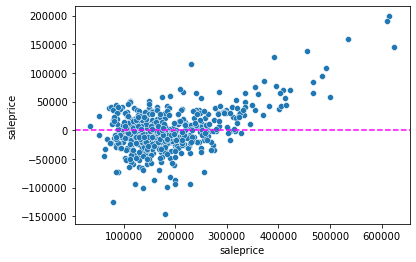

In [130]:
sns.scatterplot(x=y_test,y=test_pred)
plt.axhline(y=0,color='magenta',linestyle='--')

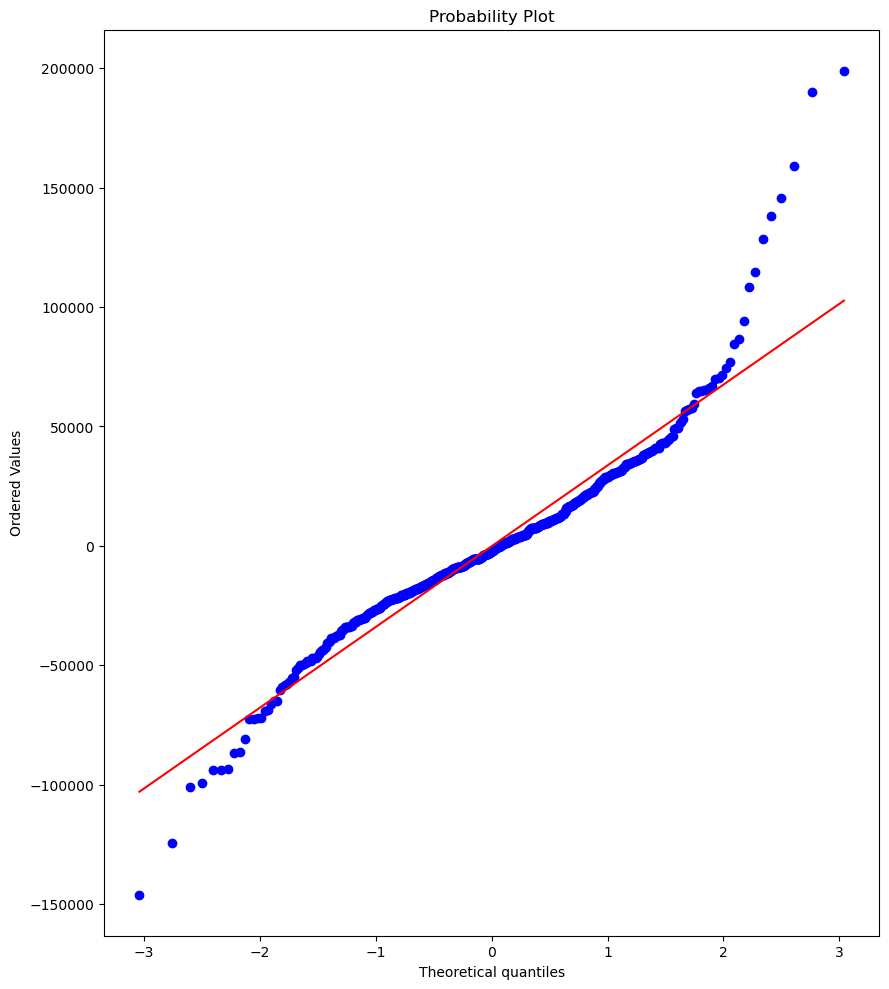

In [131]:
fig,ax = plt.subplots(figsize=(10,12),dpi=100)

_=sp.stats.probplot(test_pred,plot=ax)

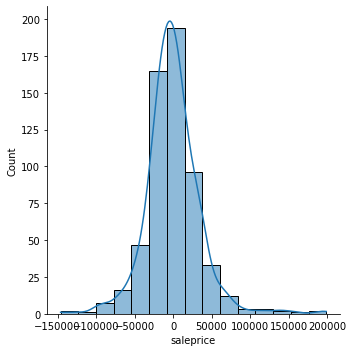

In [132]:
sns.displot(test_pred,bins=15,kde=True)

In [133]:
#dump(scaler,"cs1_Ames_Housing_scaler.pkl")

In [134]:
#dump(lasso_model,"cs1_Ames_Housing_model.h5")